## Calibrating Trip Mode Choice
This script will iteratively perform updates to the trip mode choice coefficients config file in order to match model outputs to calibration targets.

### Load Libraries

In [29]:
import pandas as pd
import numpy as np
import os
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import display
import importlib
import asim_trip_calib_util
importlib.reload(asim_trip_calib_util)
# from asim_trip_calib_util import *
# check to make sure the dictionaries specifying names for calibration targets and activitysim outputs are consistent
asim_trip_calib_util.check_input_dictionaries_for_consistency()

No problems found in input dictionaries


### Required Inputs
This script requires a working version of ActivitySim installed in the conda environment.  Input data sources are:
* Initial model output directory that includes household, tour and trip files
* trip mode choice calibration target tables. Tables should be indexed by trip mode and columns should be tour mode.  Tables should be broken down by tour purpose
* Model config directory containing the trip mode choice coefficients

Changes in tour, trip modes and purposes can be implemented by changing the dictionaries at the top of asim_trip_calib_util_CMAP.py

In [5]:
# csv file containing calibration targets by tour mode choice.
# Column names and acceptable values should be set in dict at top of script
trip_mode_choice_calib_targets_file = r"C:\abm_runs\alie\2022\calibration\trip_mc\targets\trip_mc_targets_final_disagg.csv"

# directory of the simulation.py file
simpy_dir = r"C:\abm_runs\alie\2022\src\asim\simulation.py"

# location of configuration files
settings_dir            = r"C:\abm_runs\alie\2022\src\asim\configs\resident\settings_mp.yaml"
configs_resident_dir    = r"C:\abm_runs\alie\2022\src\asim\configs\resident"
configs_common_dir      = r"C:\abm_runs\alie\2022\src\asim\configs\common"

warm_start_settings_mp_file = r"C:\abm_runs\alie\2022\calibration\trip_mc\scripts\settings_mp_warm_start.yaml"
cold_start_settings_mp_file = r"C:\abm_runs\alie\2022\calibration\trip_mc\scripts\settings_mp_cold_start.yaml"
trip_mc_coef_file           = None #r"C:\abm_runs\alie\2022\calibration\trip_mc\Output\calibration_output_an_iter_PostAO\trip_mode_choice_coeffs.csv"

# input data location
data_dir  = r"C:\abm_runs\alie\2022\input"
skims_dir = r"C:\abm_runs\alie\2022\output\skims"

# output location
output_dir          = r"C:\abm_runs\alie\2022\calibration\trip_mc\output\calibration_output_an_iter_cold"
activitysim_run_dir = r"C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir"

# calibration iterations
calibration_iterations_to_run = 5

# want to do intial model run first?
want_to_do_initial_model_run = True  # True or False

# calibration settings
max_ASC_adjust = 5 # maximum allowed adjustment per iteration
damping_factor = 1 # constant multiplied to all adjustments
adjust_when_zero_counts = 2 # coefficient change when have target counts but no model counts (or vise-versa)


--------------- User should not have to change anything below this line ----------------------

## Initial Model Run

In [3]:
### Change directory to model setup
### i.e. the location of simulation.py script
os.chdir(simpy_dir)

Processing ActivitySim output tables for trip mode choice calibration...
Sample rate of  1 results in  12835872 out of 12835872 tours
Reading trip mode choice coefficient file...
Reading trip mode choice calibration target file...
Scaling calibration targets to match model output...


c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\a

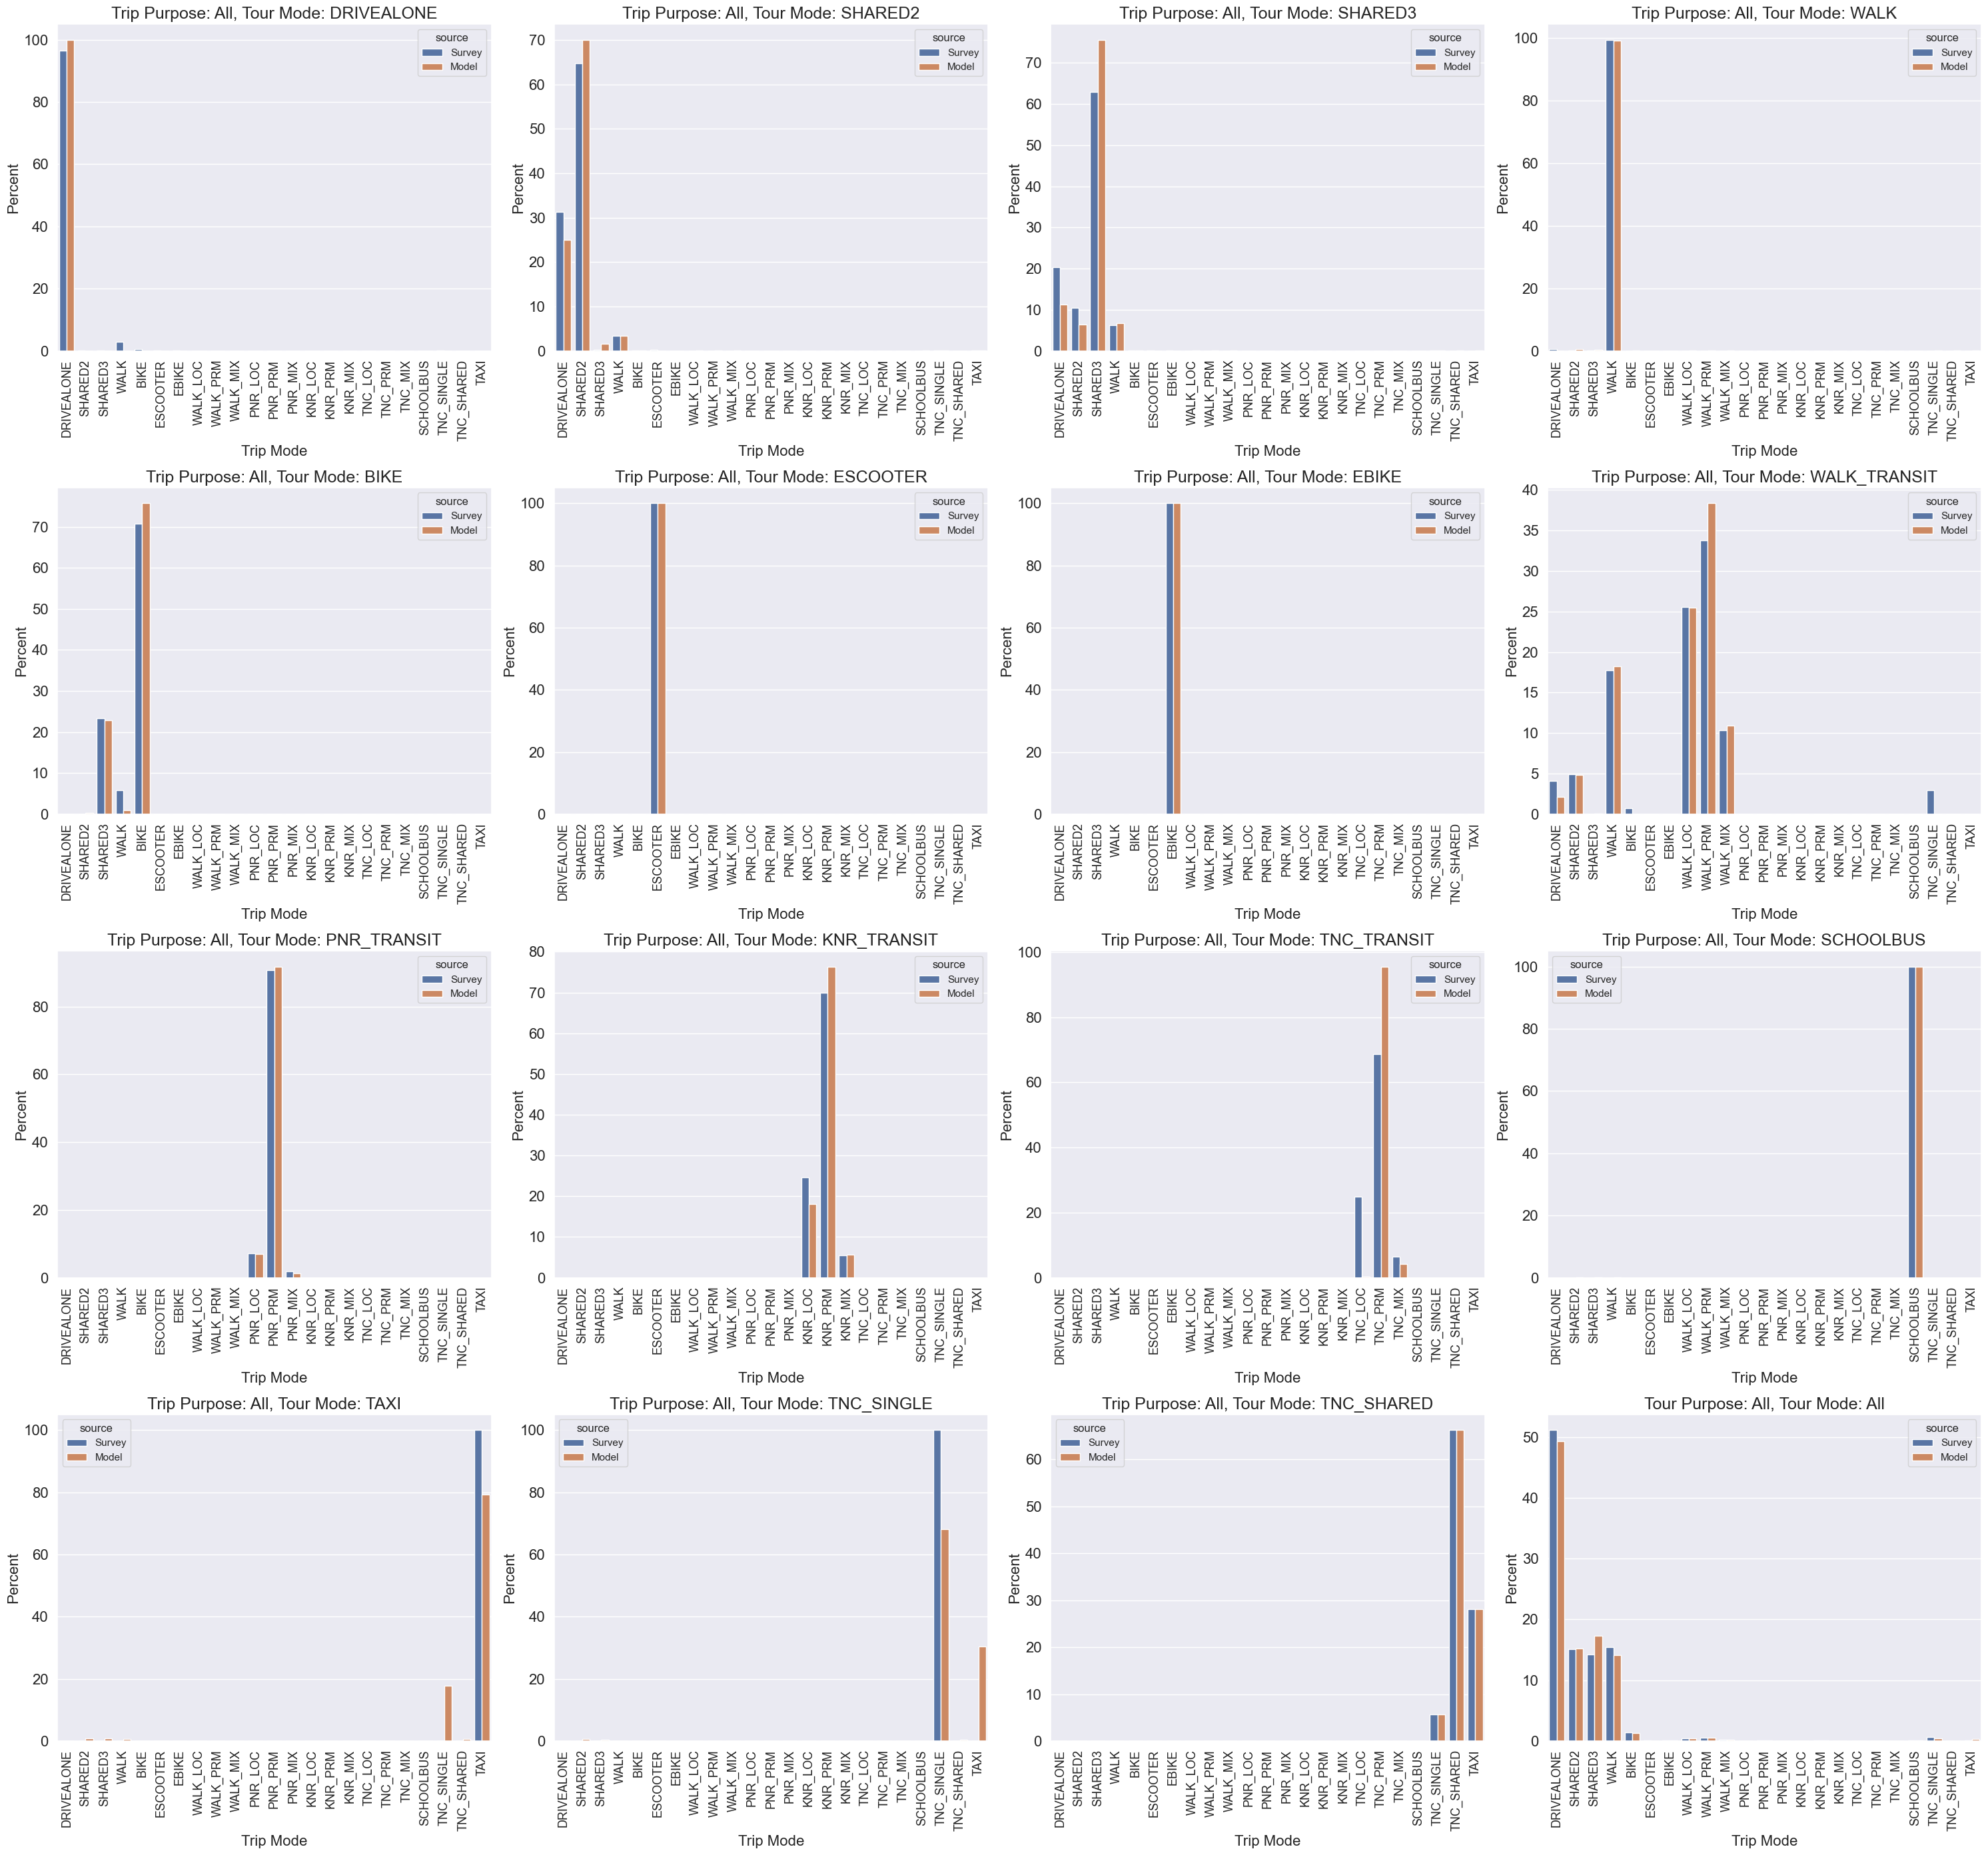

Coefficient Statistics: 
	 3123 total coefficients
	 156 coefficients adjusted
	 3015 coefficients converged
	 108 coefficients not converged


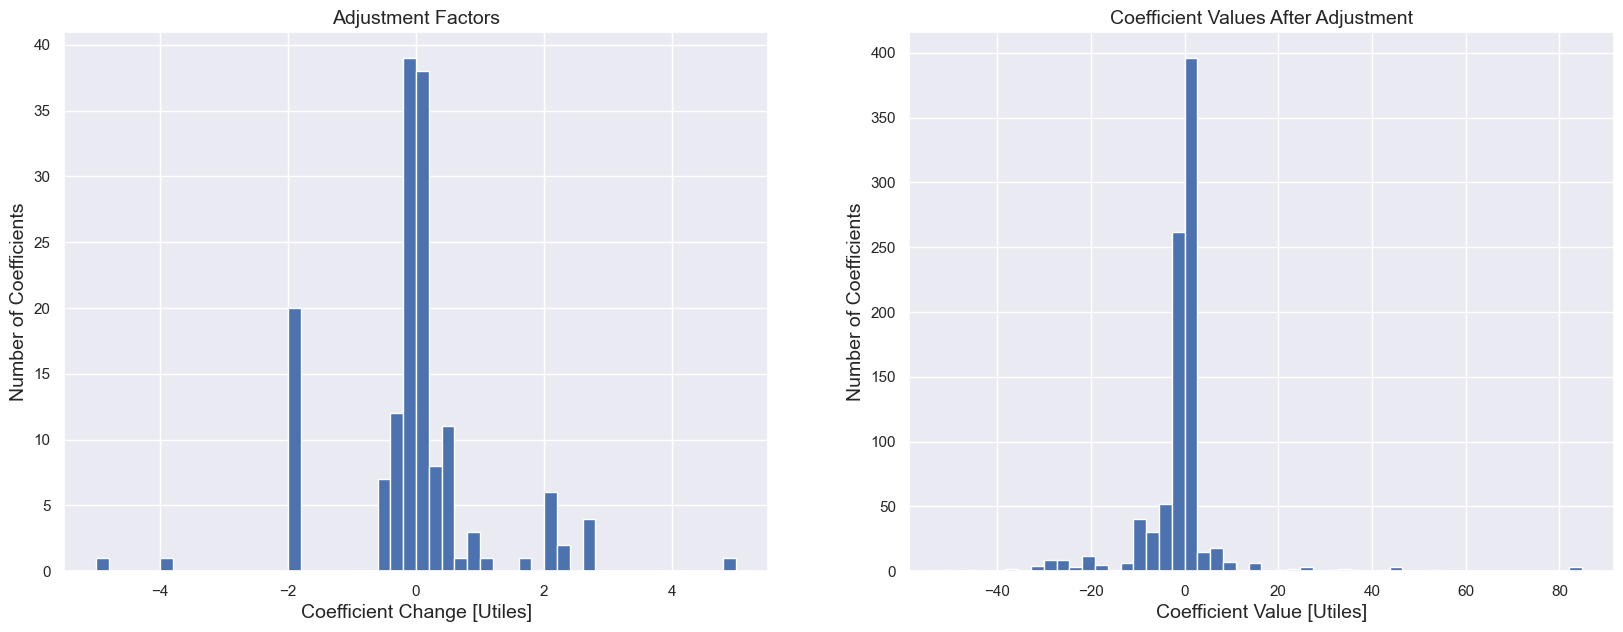

Top 10 largest coefficients:


coefficient_name purpose      value  \
618                  coef_calib_tourknr_WALK_MIX_univ    univ  84.754200   
616                  coef_calib_tourknr_WALK_LOC_univ    univ  84.754200   
617                  coef_calib_tourknr_WALK_PRM_univ    univ  84.754200   
503              coef_calib_tourwtran_TNC_SINGLE_work    work  47.982077   
202                     coef_calib_tourbike_WALK_work    work -50.000000   
1791       coef_calib_tourknrjointtour0_WALK_MIX_disc    disc  46.284400   
1789       coef_calib_tourknrjointtour0_WALK_LOC_disc    disc  46.284400   
1790       coef_calib_tourknrjointtour0_WALK_PRM_disc    disc  46.284400   
2392                         coef_calib_tourbike_WALK     NaN -44.000000   
1586  coef_calib_tourwtranjointtour0_TNC_SINGLE_maint   maint  40.312418   

      scaled_model_percent  scaled_target_percent coef_change  new_value  \
618                    0.0                    0.0        <NA>  84.754200   
616                    0.0                    0.0        <NA>  84.754200   
617                    0.0                    0.0        <NA>  84.754200   
503                    2.0                 2549.0           5  52.982077   
202                   27.0                    0.0          -2 -52.000000   
1791                   0.0                    0.0        <NA>  46.284400   
1789                   0.0                    0.0        <NA>  46.284400   
1790                   0.0                    0.0        <NA>  46.284400   
2392                   NaN                    NaN        <NA> -44.000000   
1586                   0.0                  603.0           2  42.312418   

      converged  
618        True  
616        True  
617        True  
503       False  
202       False  
1791       True  
1789       True  
1790       True  
2392       True  
1586      False

In [34]:
if want_to_do_initial_model_run:
    # asim_trip_calib_util.run_activitysim(
    #     data_dir=data_dir,  # data inputs for ActivitySim
    #     skims_dir=skims_dir,
    #     simpy_dir=simpy_dir,
    #     configs_resident_dir=configs_resident_dir,  # these files are copied to the config section of the run directory
    #     configs_common_dir=configs_common_dir,  # just the location of the common config, these files will be used from the original location
    #     run_dir=activitysim_run_dir,  # ActivitySim run directory
    #     output_dir=output_dir,  # location to store run model outputs
    #     settings_file=cold_start_settings_mp_file,  # optional: ActivitySim settings.yaml to replace the one in configs_dir
    #     trip_mc_coef_file=trip_mc_coef_file  # optional: trip_mode_choice_coefficients.csv to replace the one in configs_dir
    # )
    
    _ = asim_trip_calib_util.perform_trip_mode_choice_model_calibration(
        asim_output_dir=r'C:\abm_runs\alie\2022\output\resident', # folder containing the activitysim model output
        asim_configs_dir=configs_resident_dir,  # folder containing activitysim trip mode choice config files
        trip_mode_choice_calib_targets_file=trip_mode_choice_calib_targets_file,  # folder containing trip mode choice calibration tables
        max_ASC_adjust=max_ASC_adjust,  
        damping_factor=damping_factor,  # constant multiplied to all adjustments
        adjust_when_zero_counts=adjust_when_zero_counts,
        output_dir=output_dir,  # location to write model calibration steps
    )
    trip_mc_coef_file = os.path.join(output_dir, 'trip_mode_choice_coefficients.csv') 
else:
    print("No initial model run performed.")
    

In [ ]:
_ = asim_trip_calib_util.perform_trip_mode_choice_model_calibration(
        asim_output_dir=output_dir, # folder containing the activitysim model output
        asim_configs_dir=os.path.join(activitysim_run_dir, 'configs'),  # folder containing activitysim trip mode choice config files
        trip_mode_choice_calib_targets_file=trip_mode_choice_calib_targets_file,  # folder containing trip mode choice calibration tables
        max_ASC_adjust=max_ASC_adjust,  
        damping_factor=damping_factor,  # constant multiplied to all adjustments
        adjust_when_zero_counts=adjust_when_zero_counts,
        output_dir=output_dir,  # location to write model calibration steps
    )

In [32]:
output_dir

'C:\\abm_runs\\alie\\2022\\calibration\\trip_mc\\output\\calibration_output_an_iter_cold'

## Iterating

creating output_dir at C:\abm_runs\alie\2022\calibration\trip_mc\output\calibration_output_an_iter_1
ActivitySim run started at:  2025-12-15 16:10:55.333502
python C:\abm_runs\alie\2022\src\asim\simulation.py -s C:\abm_runs\alie\2022\calibration\trip_mc\scripts\settings_mp_warm_start.yaml -c C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir\configs -c C:\abm_runs\alie\2022\src\asim\configs\common -d C:\abm_runs\alie\2022\input -d C:\abm_runs\alie\2022\output\skims -o C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir
STDOUT: INFO:activitysim:Configured logging using basicConfig
INFO - Read logging configuration from: C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir\configs\logging.yaml
INFO - SETTING configs_dir: (WindowsPath('C:/abm_runs/alie/2022/calibration/trip_mc/output/activitysim_run_dir/configs'), WindowsPath('C:/abm_runs/alie/2022/src/asim/configs/common'))
INFO - SETTING settings_file_name: C:\abm_runs\alie\2022\calibra

c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\a

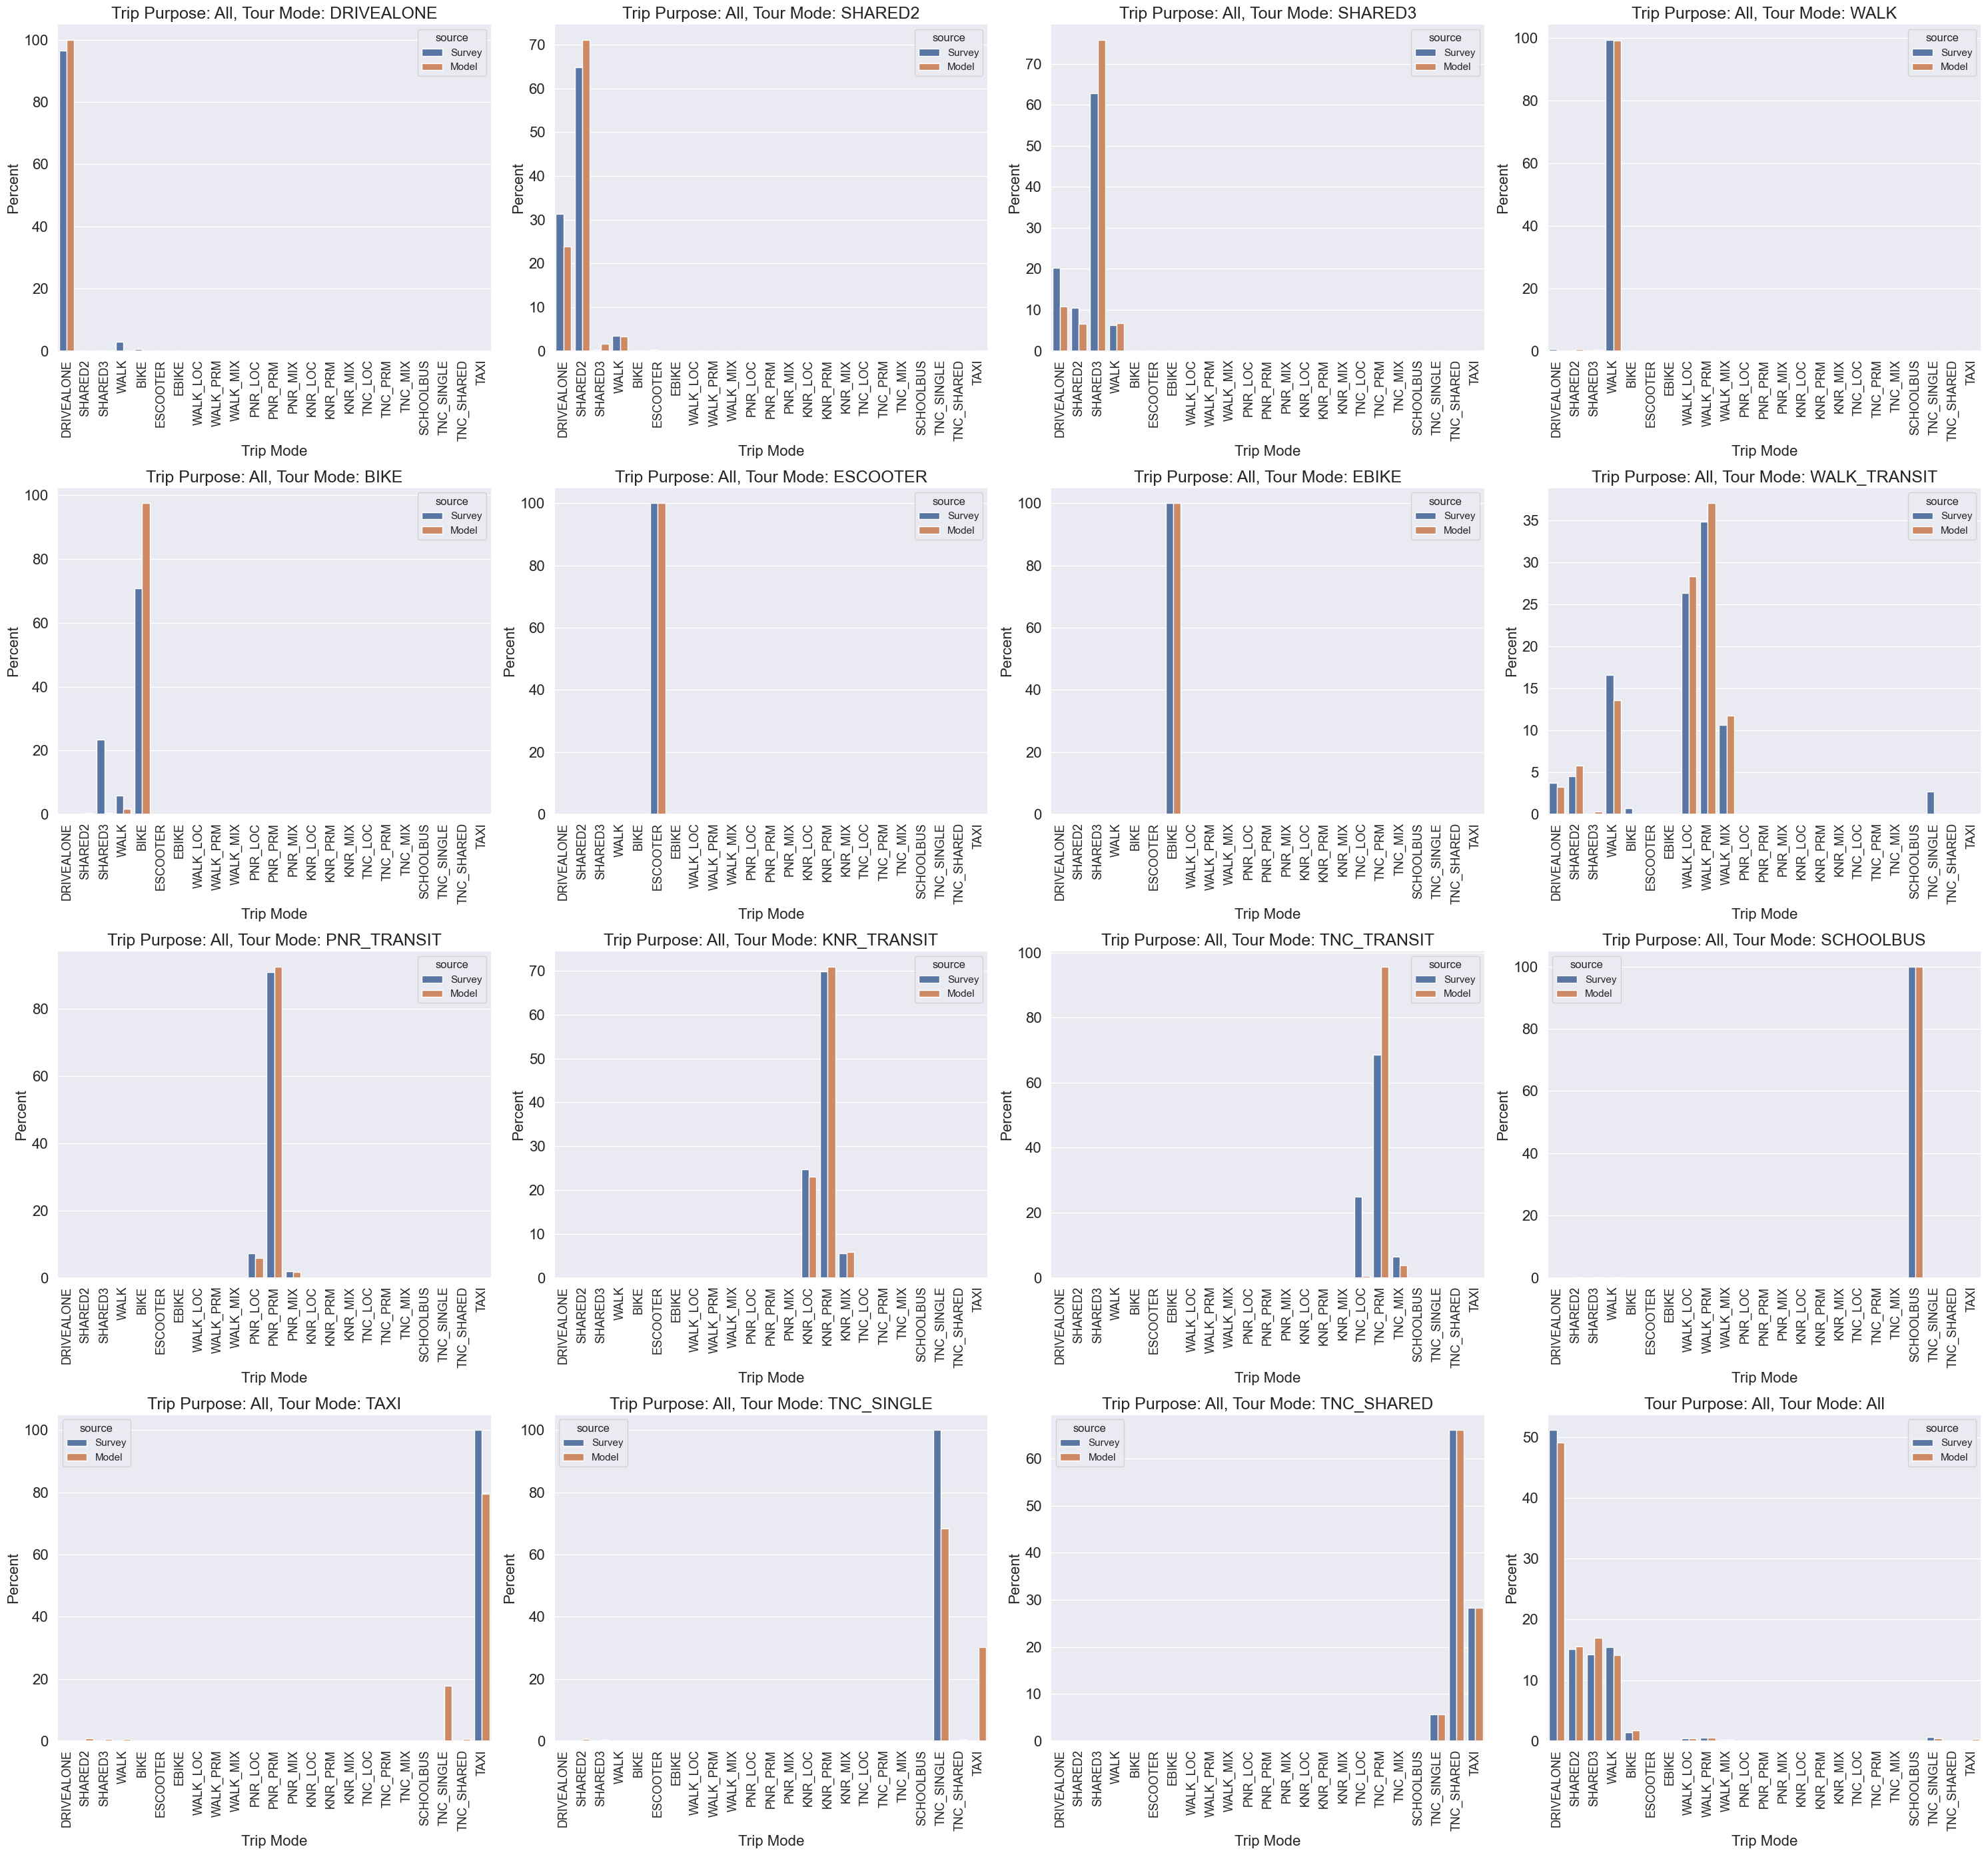

Coefficient Statistics: 
	 3123 total coefficients
	 157 coefficients adjusted
	 3002 coefficients converged
	 121 coefficients not converged


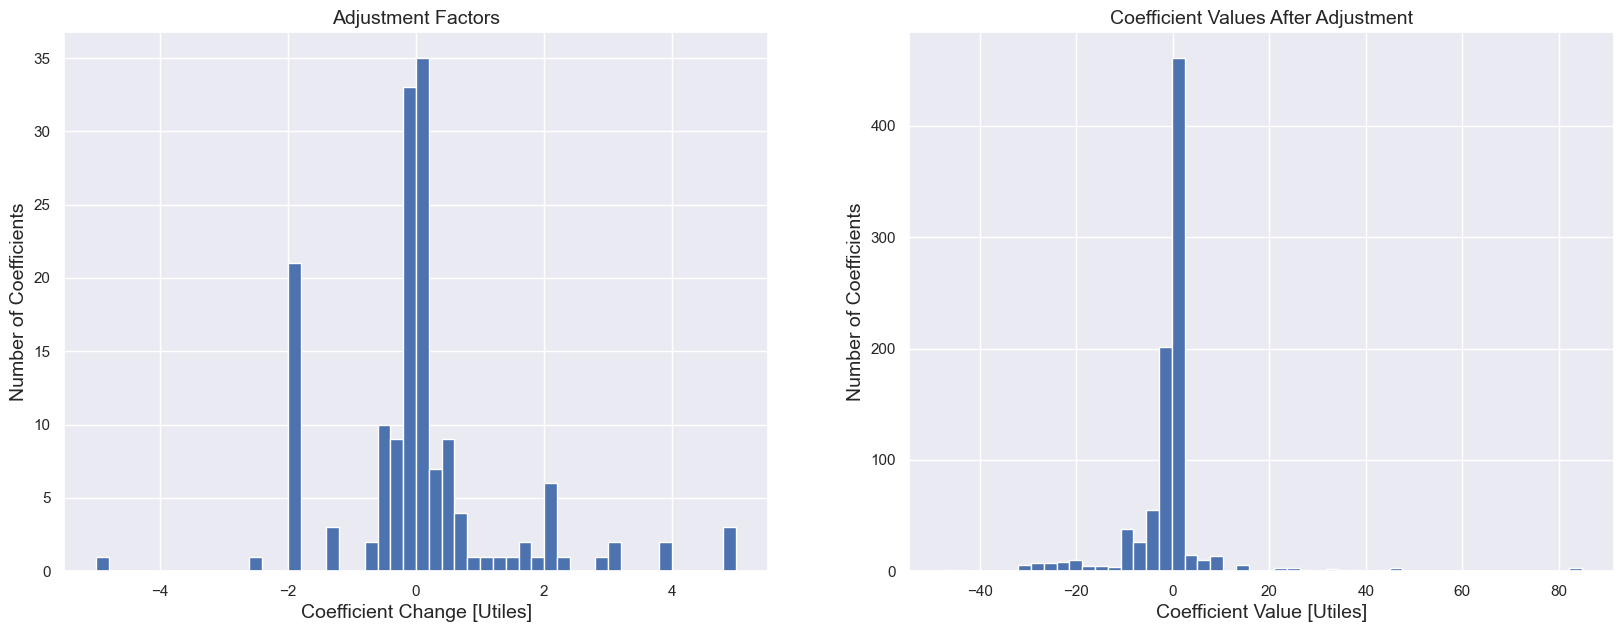

Top 10 largest coefficients:


coefficient_name purpose      value  \
617                  coef_calib_tourknr_WALK_PRM_univ    univ  84.754200   
616                  coef_calib_tourknr_WALK_LOC_univ    univ  84.754200   
618                  coef_calib_tourknr_WALK_MIX_univ    univ  84.754200   
202                     coef_calib_tourbike_WALK_work    work -46.000000   
1789       coef_calib_tourknrjointtour0_WALK_LOC_disc    disc  46.284400   
1790       coef_calib_tourknrjointtour0_WALK_PRM_disc    disc  46.284400   
1791       coef_calib_tourknrjointtour0_WALK_MIX_disc    disc  46.284400   
2392                         coef_calib_tourbike_WALK     NaN -44.000000   
503              coef_calib_tourwtran_TNC_SINGLE_work    work  37.982077   
1586  coef_calib_tourwtranjointtour0_TNC_SINGLE_maint   maint  36.312418   

      scaled_model_percent  scaled_target_percent coef_change  new_value  \
617                    0.0                    0.0        <NA>  84.754200   
616                    0.0                    0.0        <NA>  84.754200   
618                    0.0                    0.0        <NA>  84.754200   
202                   66.0                    0.0          -2 -48.000000   
1789                   0.0                    0.0        <NA>  46.284400   
1790                   0.0                    0.0        <NA>  46.284400   
1791                   0.0                    0.0        <NA>  46.284400   
2392                   NaN                    NaN        <NA> -44.000000   
503                    2.0                 1979.0           5  42.982077   
1586                   0.0                  527.0           2  38.312418   

      converged  
617        True  
616        True  
618        True  
202       False  
1789       True  
1790       True  
1791       True  
2392       True  
503       False  
1586      False

creating output_dir at C:\abm_runs\alie\2022\calibration\trip_mc\output\calibration_output_an_iter_2
ActivitySim run started at:  2025-12-15 16:58:33.781865
python C:\abm_runs\alie\2022\src\asim\simulation.py -s C:\abm_runs\alie\2022\calibration\trip_mc\scripts\settings_mp_warm_start.yaml -c C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir\configs -c C:\abm_runs\alie\2022\src\asim\configs\common -d C:\abm_runs\alie\2022\input -d C:\abm_runs\alie\2022\output\skims -o C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir
STDOUT: INFO:activitysim:Configured logging using basicConfig
INFO - Read logging configuration from: C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir\configs\logging.yaml
INFO - SETTING configs_dir: (WindowsPath('C:/abm_runs/alie/2022/calibration/trip_mc/output/activitysim_run_dir/configs'), WindowsPath('C:/abm_runs/alie/2022/src/asim/configs/common'))
INFO - SETTING settings_file_name: C:\abm_runs\alie\2022\calibra

c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\a

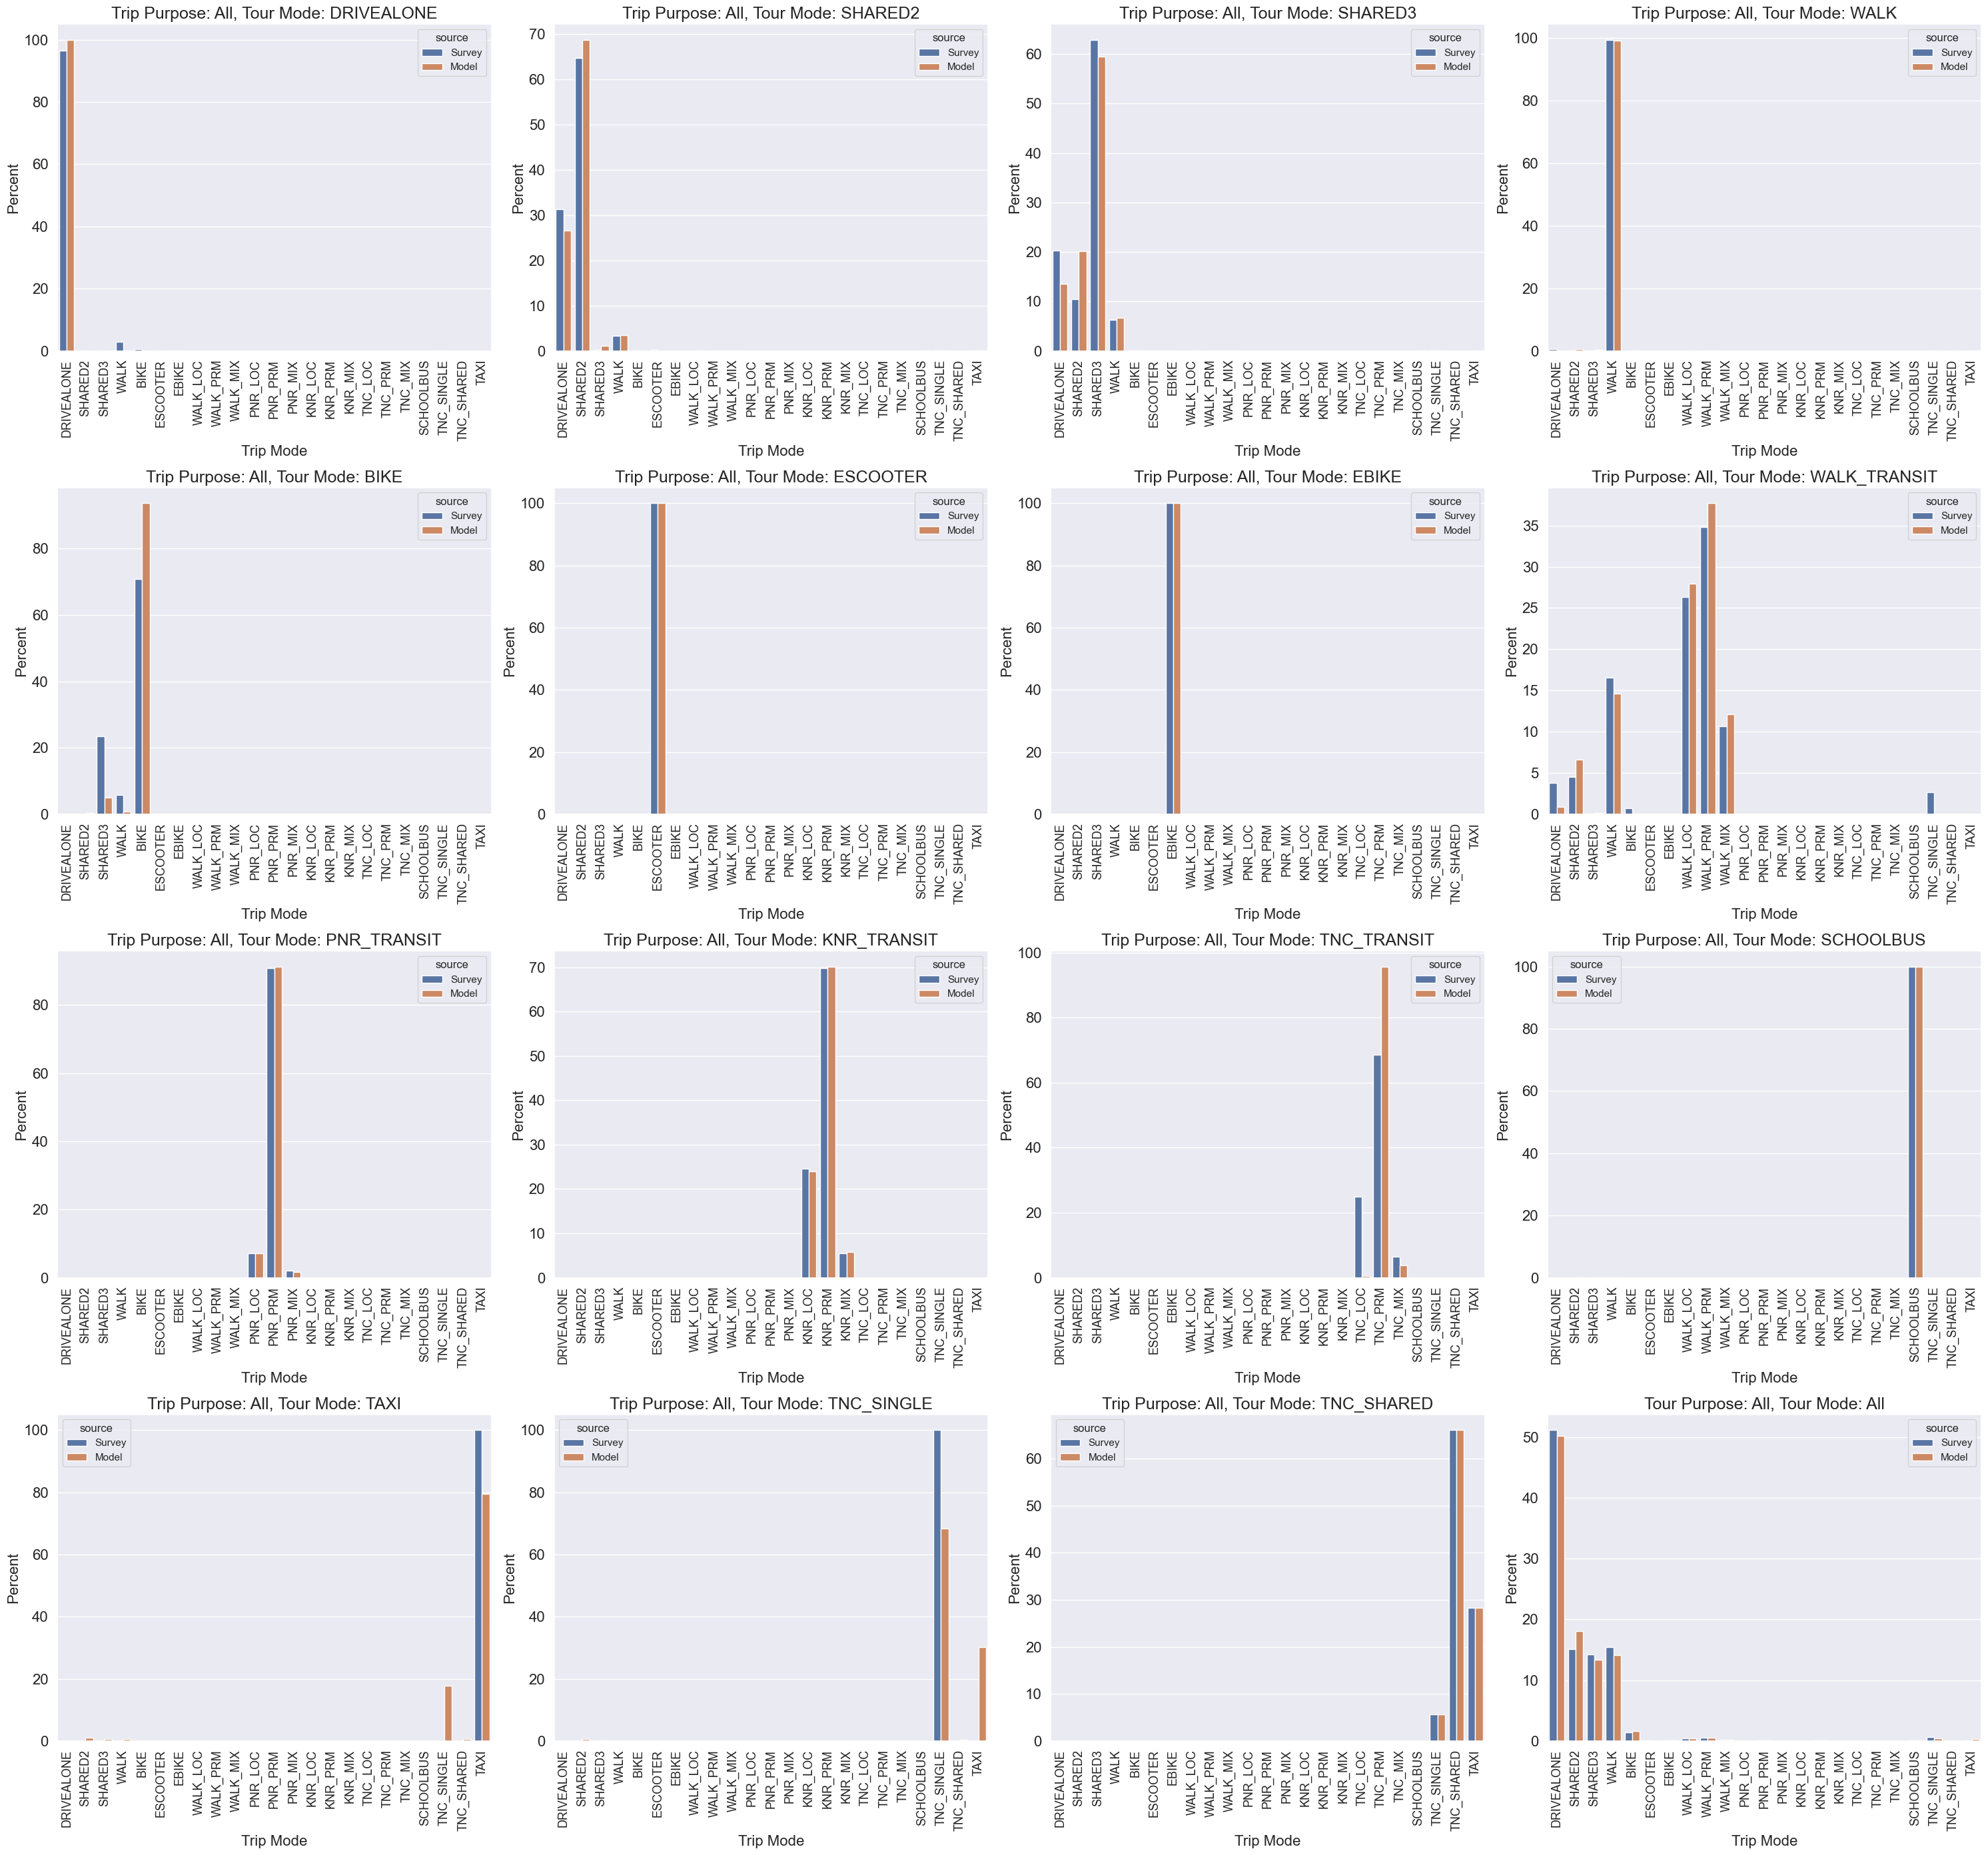

Coefficient Statistics: 
	 3123 total coefficients
	 157 coefficients adjusted
	 3005 coefficients converged
	 118 coefficients not converged


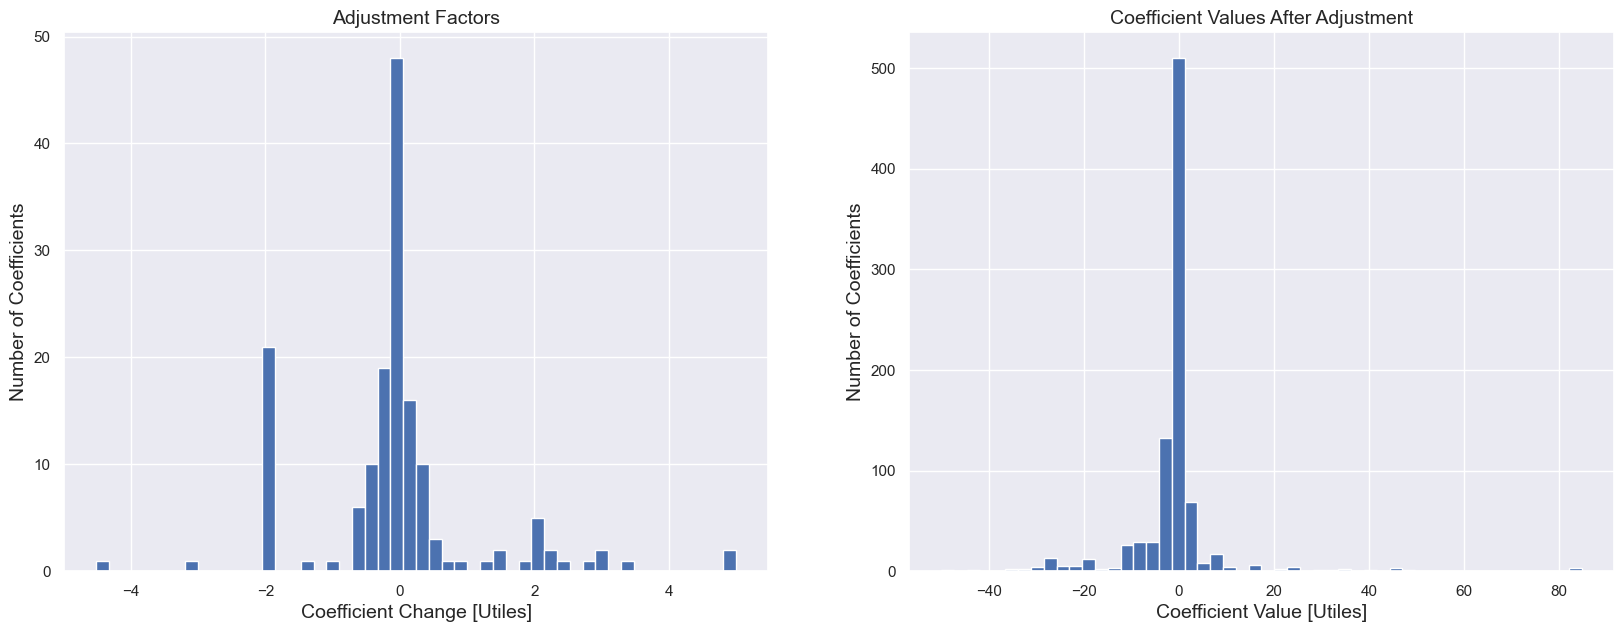

Top 10 largest coefficients:


coefficient_name purpose      value  \
618                  coef_calib_tourknr_WALK_MIX_univ    univ  84.754200   
617                  coef_calib_tourknr_WALK_PRM_univ    univ  84.754200   
616                  coef_calib_tourknr_WALK_LOC_univ    univ  84.754200   
202                     coef_calib_tourbike_WALK_work    work -48.000000   
503              coef_calib_tourwtran_TNC_SINGLE_work    work  42.982077   
1789       coef_calib_tourknrjointtour0_WALK_LOC_disc    disc  46.284400   
1790       coef_calib_tourknrjointtour0_WALK_PRM_disc    disc  46.284400   
1791       coef_calib_tourknrjointtour0_WALK_MIX_disc    disc  46.284400   
2392                         coef_calib_tourbike_WALK     NaN -44.000000   
1586  coef_calib_tourwtranjointtour0_TNC_SINGLE_maint   maint  38.312418   

      scaled_model_percent  scaled_target_percent coef_change  new_value  \
618                    0.0                    0.0        <NA>  84.754200   
617                    0.0                    0.0        <NA>  84.754200   
616                    0.0                    0.0        <NA>  84.754200   
202                   37.0                    0.0          -2 -50.000000   
503                    2.0                 1979.0           5  47.982077   
1789                   0.0                    0.0        <NA>  46.284400   
1790                   0.0                    0.0        <NA>  46.284400   
1791                   0.0                    0.0        <NA>  46.284400   
2392                   NaN                    NaN        <NA> -44.000000   
1586                   0.0                  527.0           2  40.312418   

      converged  
618        True  
617        True  
616        True  
202       False  
503       False  
1789       True  
1790       True  
1791       True  
2392       True  
1586      False

creating output_dir at C:\abm_runs\alie\2022\calibration\trip_mc\output\calibration_output_an_iter_3
ActivitySim run started at:  2025-12-15 17:48:35.180238
python C:\abm_runs\alie\2022\src\asim\simulation.py -s C:\abm_runs\alie\2022\calibration\trip_mc\scripts\settings_mp_warm_start.yaml -c C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir\configs -c C:\abm_runs\alie\2022\src\asim\configs\common -d C:\abm_runs\alie\2022\input -d C:\abm_runs\alie\2022\output\skims -o C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir
STDOUT: INFO:activitysim:Configured logging using basicConfig
INFO - Read logging configuration from: C:\abm_runs\alie\2022\calibration\trip_mc\output\activitysim_run_dir\configs\logging.yaml
INFO - SETTING configs_dir: (WindowsPath('C:/abm_runs/alie/2022/calibration/trip_mc/output/activitysim_run_dir/configs'), WindowsPath('C:/abm_runs/alie/2022/src/asim/configs/common'))
INFO - SETTING settings_file_name: C:\abm_runs\alie\2022\calibra

c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\abm_runs\alie\2022\calibration\trip_mc\scripts\asim_trip_calib_util.py:812: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scaled_calib_target_df = scaled_calib_target_df.applymap(lambda x: 0 if x < 0 else x)
c:\a

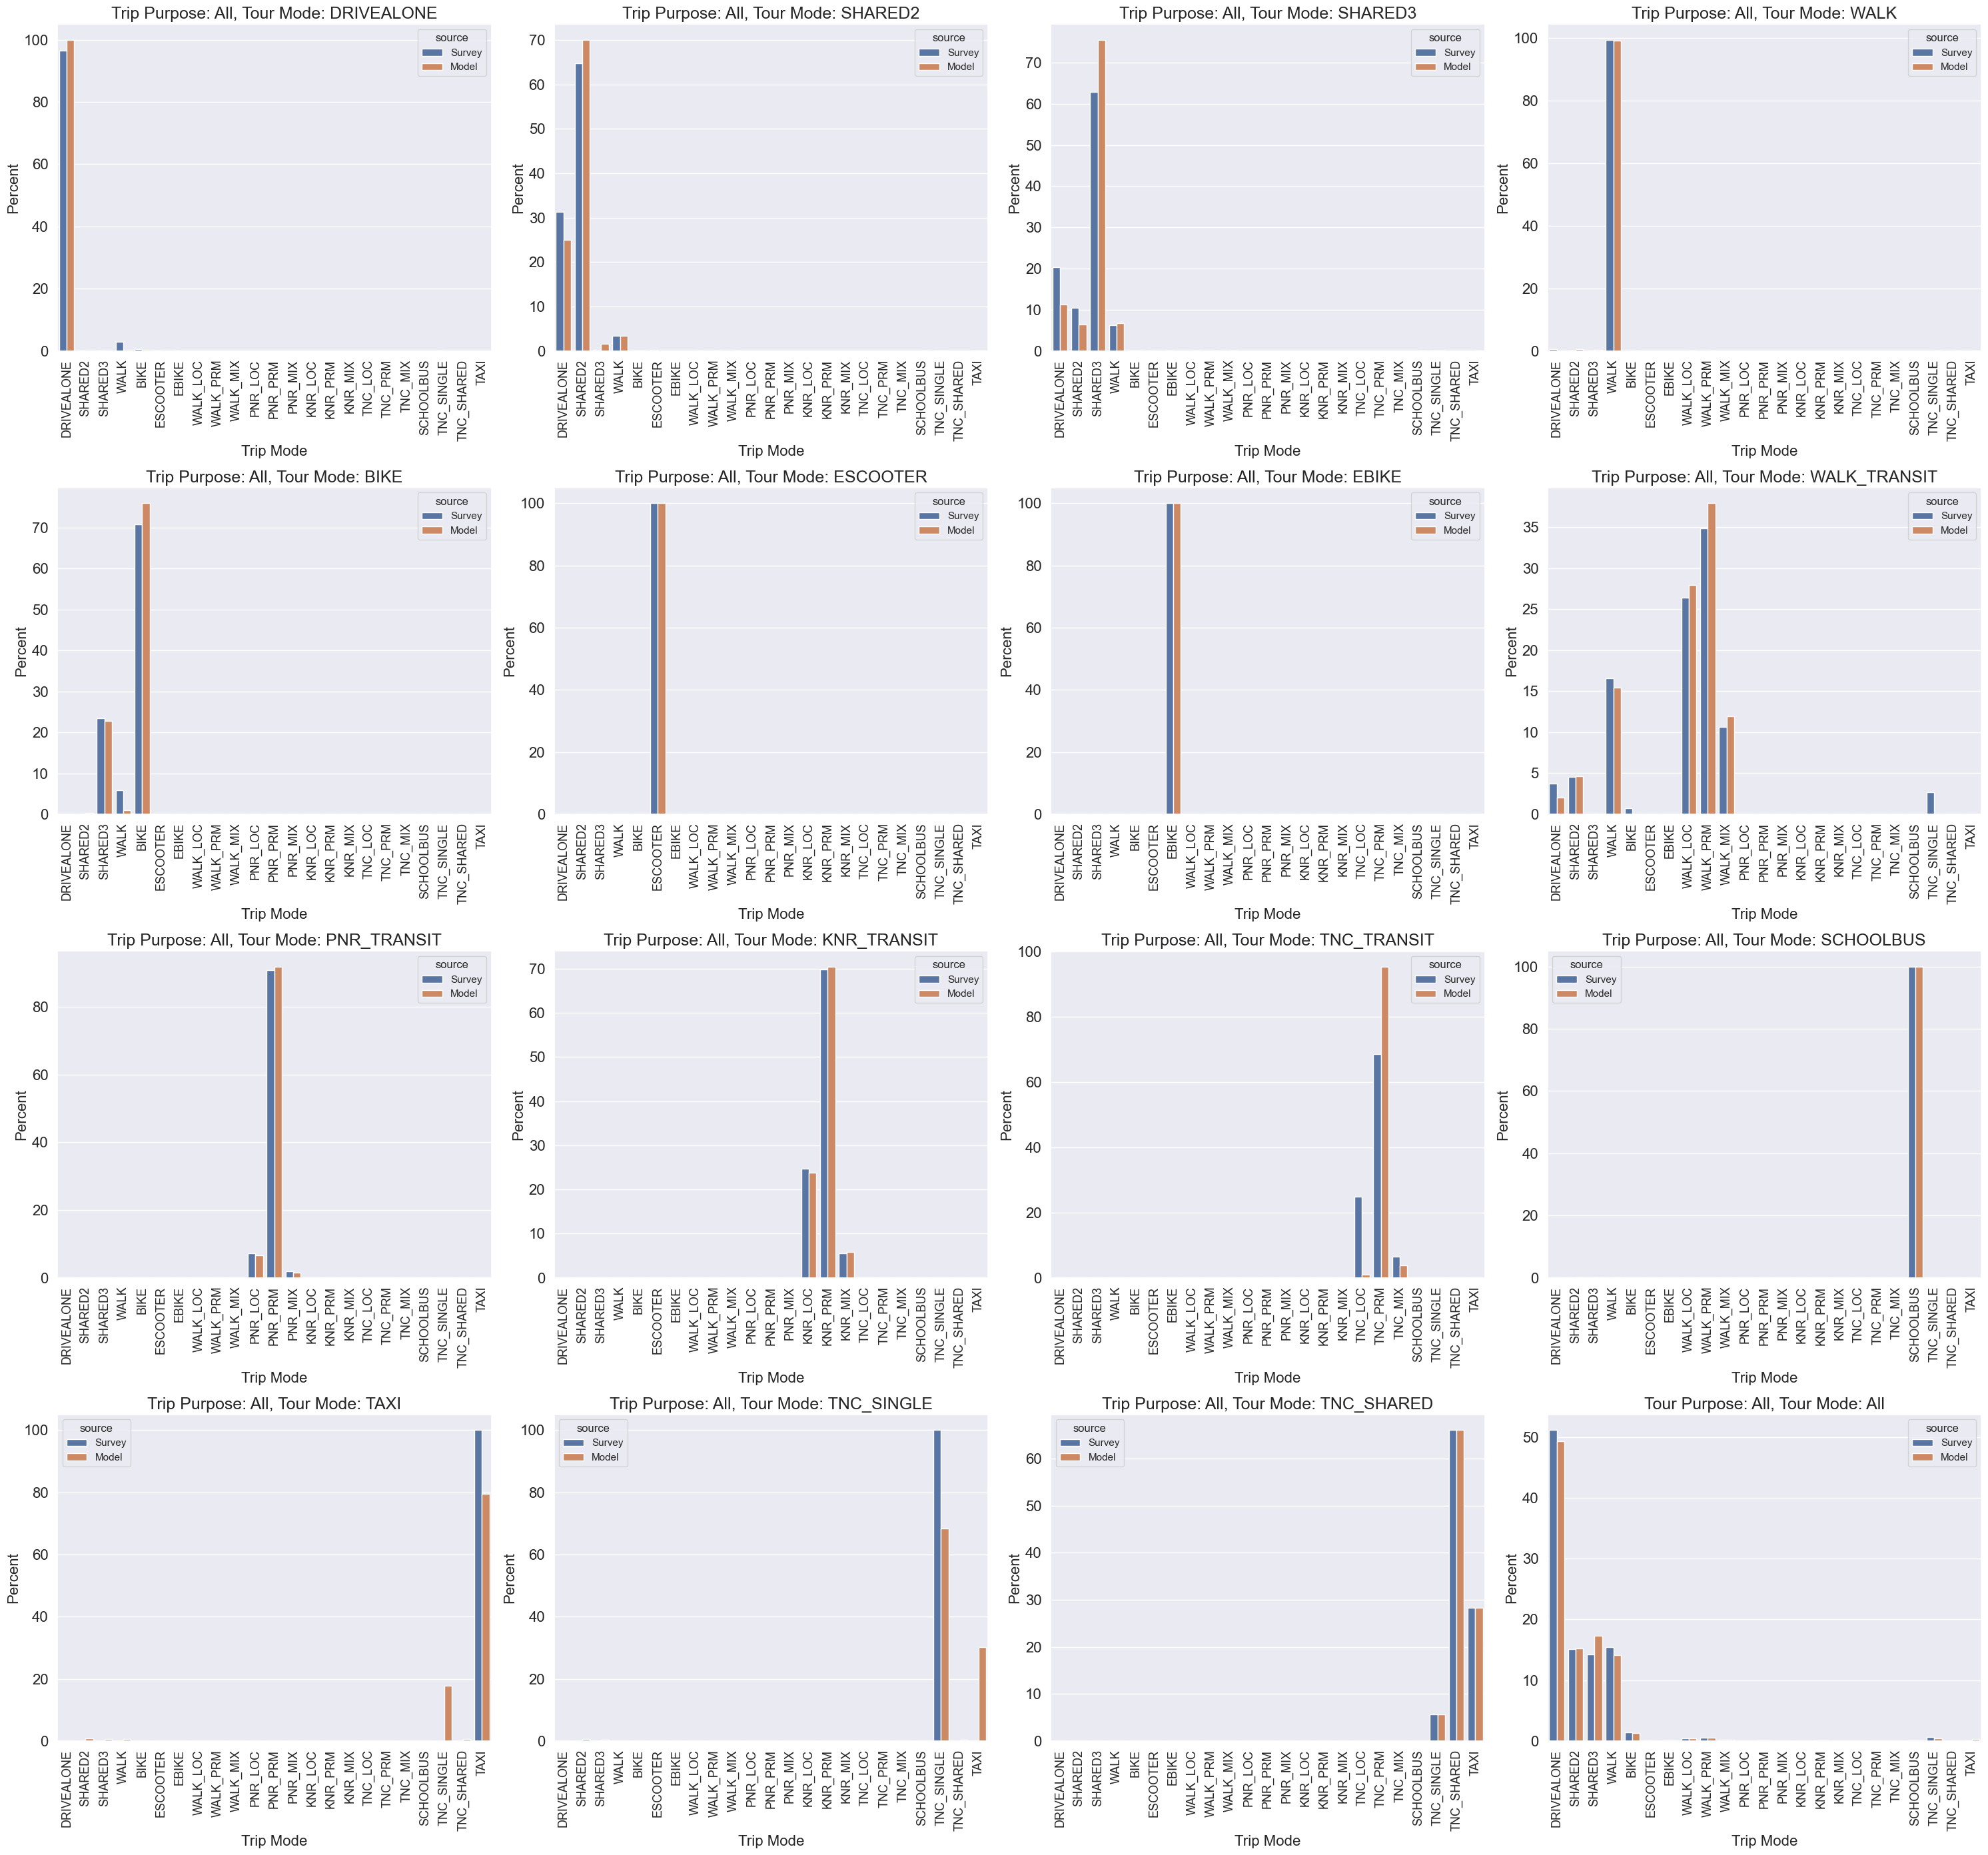

Coefficient Statistics: 
	 3123 total coefficients
	 156 coefficients adjusted
	 3012 coefficients converged
	 111 coefficients not converged


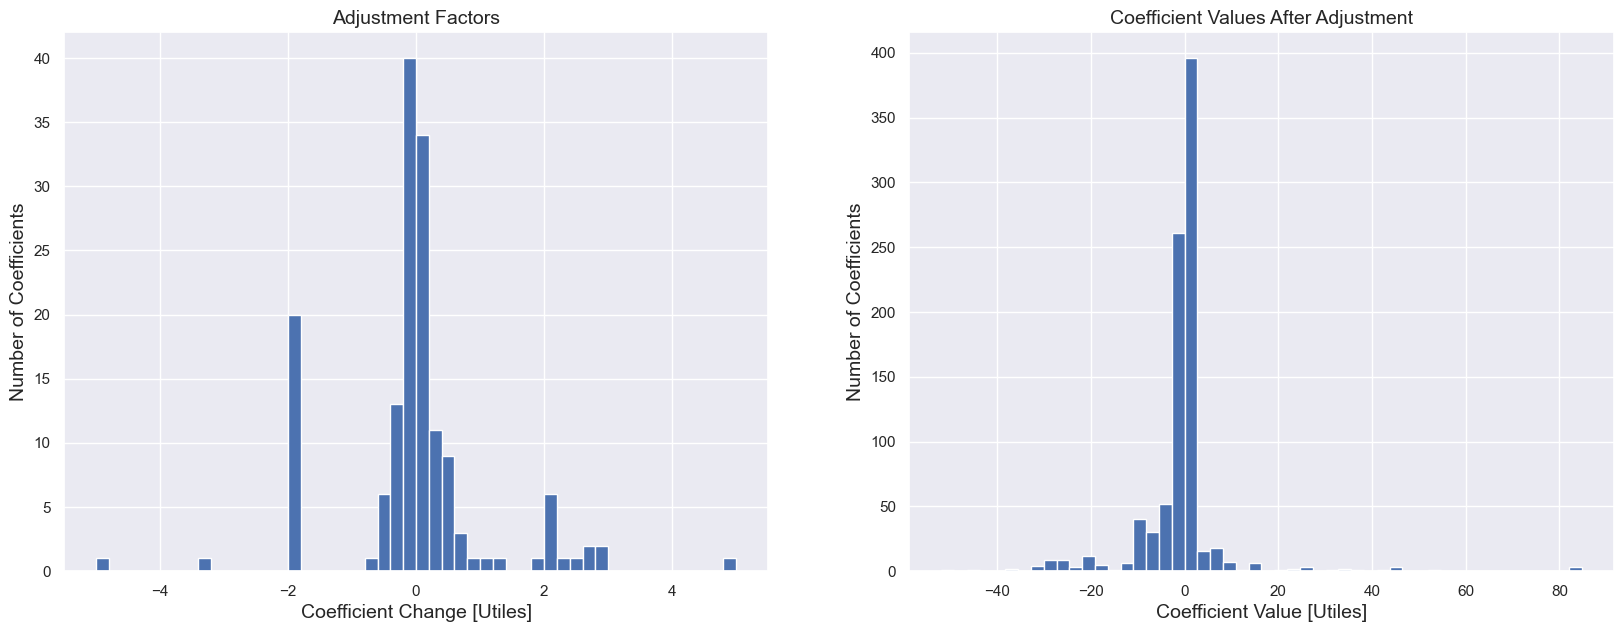

Top 10 largest coefficients:


coefficient_name purpose      value  \
618                  coef_calib_tourknr_WALK_MIX_univ    univ  84.754200   
617                  coef_calib_tourknr_WALK_PRM_univ    univ  84.754200   
616                  coef_calib_tourknr_WALK_LOC_univ    univ  84.754200   
503              coef_calib_tourwtran_TNC_SINGLE_work    work  47.982077   
202                     coef_calib_tourbike_WALK_work    work -50.000000   
1789       coef_calib_tourknrjointtour0_WALK_LOC_disc    disc  46.284400   
1790       coef_calib_tourknrjointtour0_WALK_PRM_disc    disc  46.284400   
1791       coef_calib_tourknrjointtour0_WALK_MIX_disc    disc  46.284400   
2392                         coef_calib_tourbike_WALK     NaN -44.000000   
1586  coef_calib_tourwtranjointtour0_TNC_SINGLE_maint   maint  40.312418   

      scaled_model_percent  scaled_target_percent coef_change  new_value  \
618                    0.0                    0.0        <NA>  84.754200   
617                    0.0                    0.0        <NA>  84.754200   
616                    0.0                    0.0        <NA>  84.754200   
503                    2.0                 1979.0           5  52.982077   
202                   28.0                    0.0          -2 -52.000000   
1789                   0.0                    0.0        <NA>  46.284400   
1790                   0.0                    0.0        <NA>  46.284400   
1791                   0.0                    0.0        <NA>  46.284400   
2392                   NaN                    NaN        <NA> -44.000000   
1586                   0.0                  527.0           2  42.312418   

      converged  
618        True  
617        True  
616        True  
503       False  
202       False  
1789       True  
1790       True  
1791       True  
2392       True  
1586      False



 Final coefficient table written to:  C:\abm_runs\alie\2022\calibration\trip_mc\output\calibration_output_an_iter_3\trip_mode_choice_coefficients.csv


In [33]:
iteration_output_dir = output_dir.strip('_cold') + '_1'

calibration_iterations_to_run = 3
start_iter_num = 1

for i in range(start_iter_num, calibration_iterations_to_run+start_iter_num):
    asim_trip_calib_util.run_activitysim(
        data_dir=data_dir,  # data inputs for ActivitySim
        skims_dir=skims_dir,
        simpy_dir=simpy_dir,
        configs_resident_dir=configs_resident_dir,  # these files are copied to the config section of the run directory
        configs_common_dir=configs_common_dir,  # just the location of the common config, these files will be used from the original location
        run_dir=activitysim_run_dir,  # ActivitySim run directory
        output_dir=iteration_output_dir,  # location to store run model outputs
        settings_file=warm_start_settings_mp_file,  # optional: ActivitySim settings.yaml to replace the one in configs_dir
        trip_mc_coef_file=trip_mc_coef_file  # optional: trip_mode_choice_coefficients.csv to replace the one in configs_dir
    )
    
    _ = asim_trip_calib_util.perform_trip_mode_choice_model_calibration(
        asim_output_dir=iteration_output_dir, # folder containing the activitysim model output
        asim_configs_dir=os.path.join(activitysim_run_dir, 'configs'),  # folder containing activitysim trip mode choice config files
        trip_mode_choice_calib_targets_file=trip_mode_choice_calib_targets_file,  # folder containing trip mode choice calibration tables
        max_ASC_adjust=max_ASC_adjust,  
        damping_factor=damping_factor,  # constant multiplied to all adjustments
        adjust_when_zero_counts=adjust_when_zero_counts,
        output_dir=iteration_output_dir,  # location to write model calibration steps
    )
    trip_mc_coef_file = os.path.join(iteration_output_dir, 'trip_mode_choice_coefficients.csv') 
    iteration_output_dir = iteration_output_dir.strip('_'+str(i)) + '_' + str(i+1)

print("\n\n", "Final coefficient table written to: ", trip_mc_coef_file)

In [ ]:
# trip_mc_coef_file = r'C:\abm_runs\rohans\calibration\trip_mc\output\calibration_output_an_iter_3\trip_mode_choice_coefficients.csv'
# iteration_output_dir = output_dir.strip('_cold') + '_4'

# print(trip_mc_coef_file)
# print(iteration_output_dir)

In [ ]:
# calibration_iterations_to_run = 3
# start_iter_num = 4

# for i in range(start_iter_num, calibration_iterations_to_run+start_iter_num):
#     asim_trip_calib_util.run_activitysim(
#         data_dir=data_dir,  # data inputs for ActivitySim
#         configs_resident_dir=configs_resident_dir,  # these files are copied to the config section of the run directory
#         configs_common_dir=configs_common_dir,  # these files are copied to the config section of the run directory
#         run_dir=activitysim_run_dir,  # ActivitySim run directory
#         output_dir=iteration_output_dir,  # location to store run model outputs
#         settings_file=warm_start_settings_mp_file,  # optional: ActivitySim settings.yaml to replace the one in configs_dir
#         trip_mc_coef_file=trip_mc_coef_file  # optional: trip_mode_choice_coefficients.csv to replace the one in configs_dir
#     )
    
#     _ = asim_trip_calib_util.perform_trip_mode_choice_model_calibration(
#         asim_output_dir=iteration_output_dir, # folder containing the activitysim model output
#         asim_configs_dir=os.path.join(activitysim_run_dir, 'configs'),  # folder containing activitysim trip mode choice config files
#         trip_mode_choice_calib_targets_file=trip_mode_choice_calib_targets_file,  # folder containing trip mode choice calibration tables
#         max_ASC_adjust=max_ASC_adjust,  
#         damping_factor=damping_factor,  # constant multiplied to all adjustments
#         adjust_when_zero_counts=adjust_when_zero_counts,
#         output_dir=iteration_output_dir,  # location to write model calibration steps
#     )
#     trip_mc_coef_file = os.path.join(iteration_output_dir, 'trip_mode_choice_coefficients.csv') 
#     iteration_output_dir = iteration_output_dir.strip('_'+str(i)) + '_' + str(i+1)

# print("\n\n", "Final coefficient table written to: ", trip_mc_coef_file)